In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

# Setup and Installation
- Anaconda
- Python scientific computing packages
    - cv2
    - numpy
    - scipy
    - matplotlib
    - scikit-learn
    - scikit-image

# Resources
## Books
- Computer Vision: Algorithms and Applications (https://b-ok.asia/book/766563/200307)
- Digital image processing (https://b-ok.asia/book/5062366/8e48ba)
- Computer Vision: Principles, Algorithms, Applications, Learning (https://b-ok.asia/book/3647629/015e5f)
## Courses
- Udacity Introduction to Computer Vision (https://classroom.udacity.com/courses/ud810)
- Stanford CS131 Computer Vision: Foundations and Applications (http://vision.stanford.edu/teaching/cs131_fall1920/index.html) (NO VIDEOS, JUST LECTURE NOTES)

# Image Processing and Computer Vision
## Image Processing
- Digital Image Processing is an the study of algorithms applied on images to transform them to more useful forms.
- The transformations be, for example, smoothing, sharpening or contrasting.
- The transformation used depends on the context and issue to be solved.
<img src="image_processing.png" auto/>
## Computer Vision
- Computer vision is the field that deals with how computers can gain high-level understanding from digital images or videos.
- Computer vision tasks include methods for acquiring, processing, analyzing and understanding digital images.
- It uses "Image Processing" algorithms to help solve relevant tasks.
<br/>
<img src="CV.jpg" auto/>

## Computer Vision Tasks
- Recognition (objects, activities)
<br/>
<img src="activity.png" width="500px"/>
- Object tracking
- 3D scene reconstruction
<br/>
<img src="3drecon.png" width="500px"/>
- Extracting measurements
<br/>
<img src="measure.jpg" width="500px"/>

# Our Tools
- ## Numpy
<img src="numpy.png" align="right" height="100px"/>
NumPy  is a Python library, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- ## OpenCV
<img src="opencv.png" align="right" height="150px"/>
OpenCV is a library of functions (originally developed in C++, extended later to Python) mainly aimed at real-time computer vision. 
- ## Scikit-Image
scikit-image is an open-source image processing library for Python
- ## Scikit-Learn
scikit-image is an open-source machine learning library for Python

# Introduction to Numpy

# https://numpy.org/doc/stable/user/quickstart.html

- NumPy offers computational methods for multidimensional arrays
- Multidimensional array is an n-axis mathematical object
<br/><img src="npaxes.png" height="200px"/>

## Why use Numpy arrays over python lists
- NumPy arrays are much faster than ordinary python lists because it was written in C
- ### YOU SHOULD AVOID USING PYTHON LOOPS

In [62]:
%%time
my_arr = np.arange(1000000)
print(np.sum(my_arr))

1783293664
Wall time: 1.99 ms


In [63]:
%%time
my_arr = list(range(1000000))
sum = 0
for num in my_arr:
    sum += num
print(sum)

499999500000
Wall time: 95.7 ms


## Array Creation

In [16]:
zero_array = np.zeros((5,4))                        # Create zero array of shape 5x4
print(zero_array)
ones_array = np.ones((5,4))                         # Create ones array of shape 5x4
print(ones_array)
identity_matrix = np.eye(3)                         # Create identity array of shape 3x3
print(identity_matrix)
vec = np.array([1, 2, 3])                           # Create row vector of 1x3
print(vec)
print()
col_vec = np.array([[1], [2], [3]])                 # Create column vector of 1x3
print(col_vec)
print()
custom = np.array([[1, 2, 3],[6, 7, 8]])            # Create custom 2x3 array
print(custom)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[1 2 3]

[[1]
 [2]
 [3]]

[[1 2 3]
 [6 7 8]]


## Array properties

In [65]:
M = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
print(M)
print("\nshape is {}\n".format(M.shape))                # dimensions of the matrix
print("Data type is {}\n".format(M.dtype))              # data type of matrix
print("Size is {}\n".format(M.size))                    # num of elements

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

shape is (4, 3)

Data type is int32

Size is 12



## Operations on Arrays
### Let $$M=\begin{bmatrix}1 & 2 & 3\\4 & 5 & 6\\7&8&9\\10&11&12 \end{bmatrix}$$
$$b=\begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix}$$

In [66]:
print(M.reshape(2, 6))
# you can use -1 for a dimension to auto calculate
print(M.reshape(6, -1))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [67]:
b = np.arange(3).reshape(-1, 1)
b

array([[0],
       [1],
       [2]])

## Matrix Transpose

In [68]:
print(M.T)
print(b.T)

[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]
[[0 1 2]]


In [69]:
## you can't transpose a row vector
wrong_way = np.arange(3)
wrong_way.T

array([0, 1, 2])

## By default matrix operations are element-wise

In [70]:
## add 1 to all entries
N = M + 1
print(N)
## Scale Matrix
print(M*2)
## Multiply to matrices element-wise
print(M*N)
## Perform Matrix multiplication
print(N.T @ M)
print(N @ M.T)

[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]
 [11 12 13]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]
 [20 22 24]]
[[  2   6  12]
 [ 20  30  42]
 [ 56  72  90]
 [110 132 156]]
[[188 214 240]
 [210 240 270]
 [232 266 300]]
[[ 20  47  74 101]
 [ 38  92 146 200]
 [ 56 137 218 299]
 [ 74 182 290 398]]


## Brodcasting
### You can utilize numpy axes to add a row/column vector to every row/column in a matrix

In [71]:
## muliply [0, 1, 2] by every row of M
print(M * np.arange(3))
## multiply [0, 1, 2, 3] by every column of M
print(M * np.arange(4).reshape(-1, 1))

[[ 0  2  6]
 [ 0  5 12]
 [ 0  8 18]
 [ 0 11 24]]
[[ 0  0  0]
 [ 4  5  6]
 [14 16 18]
 [30 33 36]]


## Axis-wise operations
- As you've seen, we can use, for example, `np.sum()` to get the sum of elements
- We can also get the sum of rows and columns
- This process can generalize to almost all numpy functions

In [72]:
print(np.sum(M, axis=0))        ## get the sum of columns
print(np.sum(M, axis=1))        ## get the sum of rows

[22 26 30]
[ 6 15 24 33]


## Array Concatenations
- You can concatenate arrays along any axis

In [79]:
print(np.concatenate((b.T, M), axis=0))
# OR
print(np.vstack((b.T, M)))

[[ 0  1  2]
 [ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 0  1  2]
 [ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [80]:
col = np.arange(4).reshape(-1, 1)
print(np.concatenate((M, col), axis=1))
# OR
print(np.hstack((M, col)))
# OR
print(np.c_[M, col])

[[ 1  2  3  0]
 [ 4  5  6  1]
 [ 7  8  9  2]
 [10 11 12  3]]
[[ 1  2  3  0]
 [ 4  5  6  1]
 [ 7  8  9  2]
 [10 11 12  3]]
[[ 1  2  3  0]
 [ 4  5  6  1]
 [ 7  8  9  2]
 [10 11 12  3]]


# Image Processing with OpenCV
- OpenCV is an open source library that provides a variety of tools that help developers approach image processing and computer vision complex tasks
- First, we import the OpenCV library

# Reading Images
- You can read Image files by passing file name into th function imread ,e.g `image = cv2.imread('myimage.jpg')`
- Images are represented as a 3D array where every pixel is a vector of 3 elements
- For grayscale images, images are represented as 2D array where each pixel represents intensity
## OPENCV READS IMAGES IN `BGR` FORMAT, UNLIKE MOST OTHER LIBRARIES (FOR HISTORICAL REASONS)
<img src="pixel.jpg" auto/>

In [4]:
image = cv2.imread('100.jpg')
cv2.imshow('100', image)
cv2.waitKey(0)                          # This line tells OpenCV to wait forever
cv2.destroyAllWindows()
image[:,:,0], image[:,:,2] = image[:,:,2].copy(), image[:,:,0].copy()

## You can use `matplotlib` to display image output (or figures in general) as follows

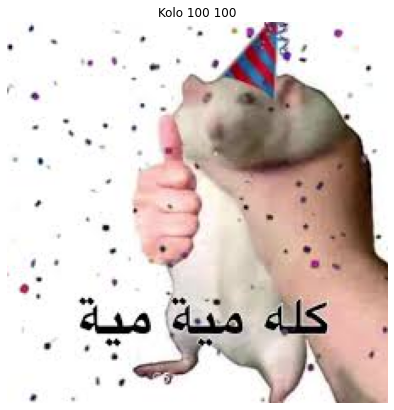

In [7]:
plt.figure(figsize=(7,7))               # Creates a figure with the specified figure size
plt.imshow(image)                       # Plots the image in the figure
plt.title('Kolo 100 100')               # tilte
plt.axis('off')                         # turn off axes
plt.show()                              # show the plot

# Reading Videos
- Videos can be opened from multiple sources such as webcams, rtsp streams, video files
- Video is composed of a sequence of images each one called a frame
- Since some of computer vision are generally computationally expensive, it is always advisable to read video streams in a different thread that the one used for computations

In [14]:
cap = cv2.VideoCapture(0)

while True:
    frame = cap.read()[1]

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## `OpenCV` UI
- OpenCV allows for users to interact with windows via mouse and keyboard
- OpenCV events bind an action to an event; a listener listens for an event, when it fires, some action happens

In [19]:
cap = cv2.VideoCapture(0)
cv2.namedWindow('frame')                    # Creates a window which opencv binds action to

drawing = False

def on_click(event, x, y, flags, params):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        cv2.circle(mask, (x,y), 50, 1)
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(mask, (x,y), 50, 1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.setMouseCallback('frame', on_click)
mask = np.zeros((480, 640))
while True:
    _, frame = cap.read()
    frame[mask == 1] = np.array([0, 255, 255])
    cv2.imshow('frame', frame)

    if 0xFF & cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Intro to GIT
# https://www.youtube.com/watch?v=SWYqp7iY_Tc
- `GIT` is a version control systems which allows developers to maintain, revise, edit code
- `GIT` makes it possible to work on different version of the same program without affecting one another (branching)

## This short intro will demo main `GIT` commands
- `git clone 'repo-url'` can be the first step to create a repo
- `git status` shows the difference between current files and the last commit
- `git add 'filename(s)'` adds file to the current commit
- `git commit -m 'commit-message'` commits changes locally to the repo
- `git push` pushes current commit to remote server
- `git pull` pulls latest changes from `master` branch

## `.gitignore` file
- This file stores regular expressions for patterns of file names which shall not be included in the commit

# Color
- Color is the result of stimulation of the eye in response to incident line rays
- In computer vision, colors are represented usually by 3 color in what we refer to `Color Spaces`
# Color Spaces
- A color space is how color is represented is by 3 channels
- Some representations are more useful for computer vision purposes; others are better for hardware
- Examples:
    - RGB
    - HSV
    - LAB
    - YUV
    
And we will discuss some of their properties using this image

<img src='apple.jpg' auto/>

<img src="rgb.png" width="300px" align="right"/>

# RGB Color Space
- RGB is an additive color Space
- It was originally designed for the color monitors
- An RGB color can be understood by thinking of it as all possible colors that can be made from three colored lights for red, green, and blue.
- Imagine, for example, shining three lights together onto a white wall in a dark room: one red light, one green light, and one blue light, each with dimmers.

In [ ]:
img = imread('apple.jpg')
cols = img.reshape(-1, 3)
#cols = cols[np.arange(0, cols.shape[0], 5)]
#img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
rgb = img.reshape(-1, 3)
#x = x[np.arange(0, x.shape[0], 5)]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x[:,0] = x[:,0] / 179.0
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax.scatter(rgb[:,0], rgb[:,1], rgb[:,2], s=1, c=cols/255.0)
plt.show()

<img src="./hsv.png" width="400px" align="right"/>

# HSV
- HSV is a more convenient color space for representing colors
- `Hue` channel represents the color of the pixel independently from the brightness
- `Satruation` channel represents the richness of the color, or how far it is from gray

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).reshape(-1, 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

h = hsv[:,0].astype('uint32')
h = h*2*np.pi/179.0

new_x = hsv[:,1] * np.cos(h)
new_y = hsv[:,1] * np.sin(h)

ax.set_xlabel('H')
ax.set_ylabel('S')
ax.set_zlabel('V')

ax.scatter(new_x, new_y, hsv[:,2], s=1, c=cols/255.0)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

ax.scatter(h, hsv[:,1], s=3, c=cols/255.0)
plt.show()

<img src="./hsi.jpg" width="400px" align="right"/>

# HSI
- HSI is similar to the `HSV` color space
- `Hue` is the same as `HSI`
- `S` and `I` change
- White is represneted when the in `HSL` when the `I` channel is 100% regardless of other values
- However, white is represented in `HSV` when `S` is near 0 and `V` takes high values
- `HSI` decouples the color information in `H` and `S` channels, and intensity information in the `I` channels
- That makes it suitable for applying graycale algorithms on the `I` channel alone, reducing time complexity to 1/3

<img src="./lab.png" height="300px" align="right"/>

# CIELAB
- It is a device independent color space
- The `L` channel represents the luminance; as `L` incresaes, the middle of the `a b` plane gets brighter 
- `a` and `b` channels represent the hue of the color
- The Euclidian distance between 2 colors makes sense here more than any other color system

<img src="./lab2.png" auto/>

In [ ]:
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB).reshape(-1, 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('L Label')
ax.set_ylabel('A Label')
ax.set_zlabel('B Label')

ax.scatter(lab[:,0], lab[:,1], lab[:,2], s=1, c=cols/255.0)
plt.show()

In [ ]:
plt.scatter(lab[:,1], lab[:,2], s=10, c=cols/255.0)